In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import ComplementNB
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from collections import Counter
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [69]:
movie_r = pd.read_csv("imdb_labelled.txt", delimiter='\t', sep=',')
movie_r.describe()

,0
count,747.000000
mean,0.516734
std,0.500055
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [70]:
movie_r.columns = ['texts', 'scores']
movie_r.head()
movie_r.columns

Index(['texts', 'scores'], dtype='object')

In [71]:
def get_labels(movie_r):
    if movie_r['scores'] == 0:
        return 'negative'
    else:
        return 'positive'

In [72]:
movie_r['labels'] = movie_r.apply(get_labels, axis=1)
movie_r.head()

,texts,scores,labels
0,Not sure who was more lost - the flat characte...,0,negative
1,Attempting artiness with black & white and cle...,0,negative
2,Very little music or anything to speak of.,0,negative
3,The best scene in the movie was when Gerardo i...,1,positive
4,"The rest of the movie lacks art, charm, meanin...",0,negative


In [73]:
movie_r['txt_len'] = movie_r['texts'].apply(lambda x: len(str(x).split(' ')))
movie_r.head()

,texts,scores,labels,txt_len
0,Not sure who was more lost - the flat characte...,0,negative,21
1,Attempting artiness with black & white and cle...,0,negative,33
2,Very little music or anything to speak of.,0,negative,10
3,The best scene in the movie was when Gerardo i...,1,positive,23
4,"The rest of the movie lacks art, charm, meanin...",0,negative,22


In [74]:
movie_r['txt_len'].unique()


array([  21,   33,   10,   23,   22,    5,   17,   12,    8,   13,    6,
         18,   25,   19,  868,   14,   16,    9,    7,   26,   35,   11,
          4,   15,   27,   28,    3,   20,   37,   24,   36,  201, 1393,
         49,   30,  306,   31,   32,   44,   56,   45,   34,   38,   64,
         58,   40,   47,   29,   73,   41,   39,   55,   53,   42,  800],
      dtype=int64)

In [75]:
X = movie_r['texts']
y = movie_r['scores']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .40, random_state = 60)

X_train.shape, y_train.tolist()[:10]

((448,), [0, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [76]:
tfidf_vect = TfidfVectorizer()

tfidf = tfidf_vect.fit_transform(X_train, y_train)
tfidf_df = pd.DataFrame(data=tfidf.toarray().astype(float), columns = tfidf_vect.get_feature_names())

tfidf_df['__labels__'] = y_train.values
tfidf_df.head()

,10,12,13,15pm,1947,1949,1971,1973,1980,1986,...,you,young,younger,your,yourself,youthful,zillion,zombie,zombiez,__labels__
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [77]:
from collections import Counter
voc = Counter(tfidf_vect.get_feature_names())
voc.most_common(10)

[('10', 1),
 ('12', 1),
 ('13', 1),
 ('15pm', 1),
 ('1947', 1),
 ('1949', 1),
 ('1971', 1),
 ('1973', 1),
 ('1980', 1),
 ('1986', 1)]

In [78]:
word = 'you'
xv = tfidf_df[tfidf_df['__labels__'] == 1][word]
xv.sort_values(ascending=False)

324    0.413760
304    0.373300
379    0.371887
159    0.341886
241    0.339601
         ...   
297    0.000000
296    0.000000
295    0.000000
293    0.000000
1      0.000000
Name: you, Length: 230, dtype: float64

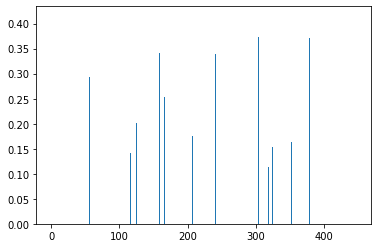

In [79]:
plt.bar(xv.index, xv.values)
plt.show()

In [82]:
from sklearn.feature_extraction.text import CountVectorizer
vectorization = Pipeline([
                        ('BoW', CountVectorizer(stop_words = 'english')),
                        ('tfidf', TfidfTransformer()),
                        ('classifier', ComplementNB())
                        ])

In [84]:
model = vectorization.fit(X_train, y_train)
pred = model.predict(X_test)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76       143
           1       0.80      0.72      0.76       156

    accuracy                           0.76       299
   macro avg       0.76      0.76      0.76       299
weighted avg       0.77      0.76      0.76       299



In [86]:
accuracy = []

stratifiedKf_pred = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)
stratifiedKf_pred.get_n_splits(X, y)

for train_index, test_index in stratifiedKf_pred.split(X, y):
    X_train1, X_test1 = X.iloc[train_index], X.iloc[test_index]
    y_train1, y_test1 = y.iloc[train_index], y.iloc[test_index]
    
    vectorization.fit(X_train1, y_train1)
    result = vectorization.score(X_test1, y_test1)
    accuracy.append(result)
    
accuracy = np.array(accuracy)
print(accuracy)
print(f"mean_accuracy = {accuracy.mean():.4f}, std_accuracy = {accuracy.std():.4f}")

[0.78       0.79333333 0.74496644 0.7852349  0.7852349 ]
mean_accuracy = 0.7778, std_accuracy = 0.0169
